In [1]:
%matplotlib inline
from __future__ import print_function

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
#import seaborn as sns

import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2
 
import importlib
import pickle
from utils.result_utils import *
root = '/Users/thorey/Documents/project/competition/fognet/models/bbking/lstm'

# clavius/model_0 

In [7]:
model0 = get_result(os.path.join(root,'model_0'),hp = ['hiddens','lr','reg'])

In [9]:
model0g = model0.groupby('hiddens')

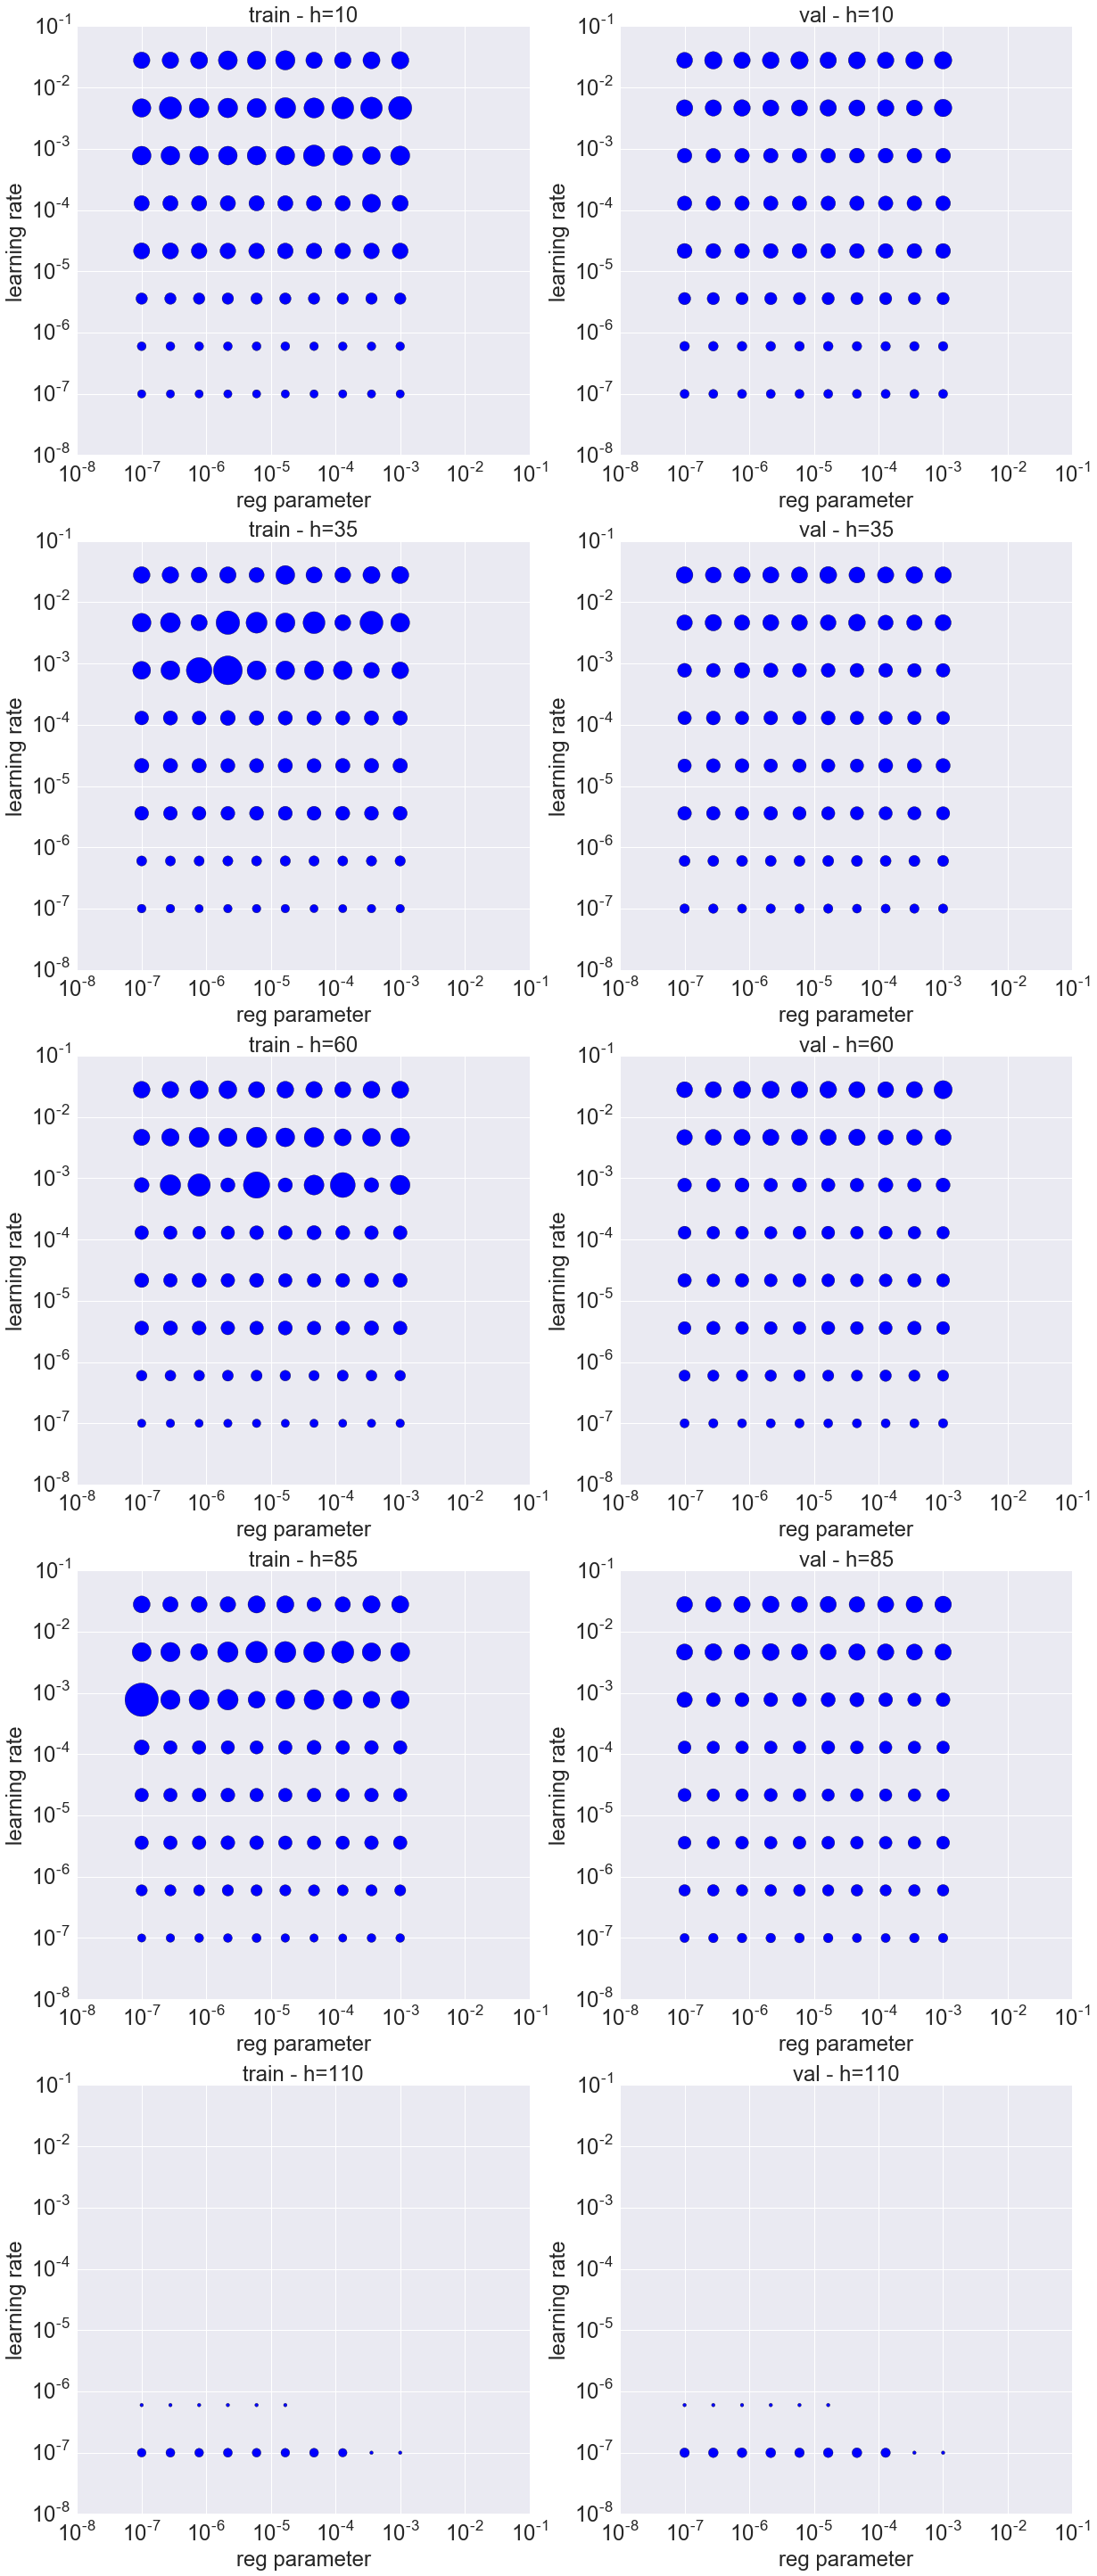

In [46]:
fig = plt.figure(figsize=(20, model0g.ngroups * 10))
gs = gridspec.GridSpec(model0g.ngroups, 2)
for i,(h,gp) in enumerate(model0g):
    ax = plt.subplot(gs[i, 0])
    ax.scatter(gp.reg,gp.lr,s =1500./gp.train)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('reg parameter',fontsize = 24)
    ax.set_ylabel('learning rate',fontsize=24)
    ax.set_title('train - h=%d'%(h),fontsize=24)
    ax.set_xlim(1e-8,1e-1)
    ax.set_ylim(1e-8,1e-1)
    ax.tick_params(labelsize=24)
    ax = plt.subplot(gs[i, 1])
    ax.scatter(gp.reg,gp.lr,s = 1500./gp.val)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('reg parameter',fontsize = 24)
    ax.set_ylabel('learning rate',fontsize=24)
    ax.set_title('val - h=%d'%(h),fontsize=24)
    ax.tick_params(labelsize=24)
    ax.set_xlim(1e-8,1e-1)
    ax.set_ylim(1e-8,1e-1)
    

# clavius/model_1

In [20]:
        parameters_grid = {'AR': range(7),
                           'D': [0, 1],
                           'MA': range(7),
                           'Season_RA': range(7),
                           'Season_D': [0, 1],
                           'Season_MA': range(7),
                           'Season_Period': [0, 6, 12]}

In [21]:
root = '/Users/cthorey/Documents/project/competition/fognet/models/ray/arima'
base_model = os.path.join(root,'model_0')
dfmodels = get_result_arima(base_model,hp = parameters_grid.keys())

In [23]:
dfmodels.to_csv('result_ray.csv')

In [24]:
os.getcwd()


'/Users/cthorey/Documents/project/competition/fognet'

In [4]:
def get_submission_df(row):
    name = os.path.join(row.root,row.model)
    sub = [f for f in os.listdir(name) if f.split('_')[0] == 'submissions'][0]
    name_sub = os.path.join(name,sub)
    df = pd.read_csv(name_sub,index_col=0)
    return df

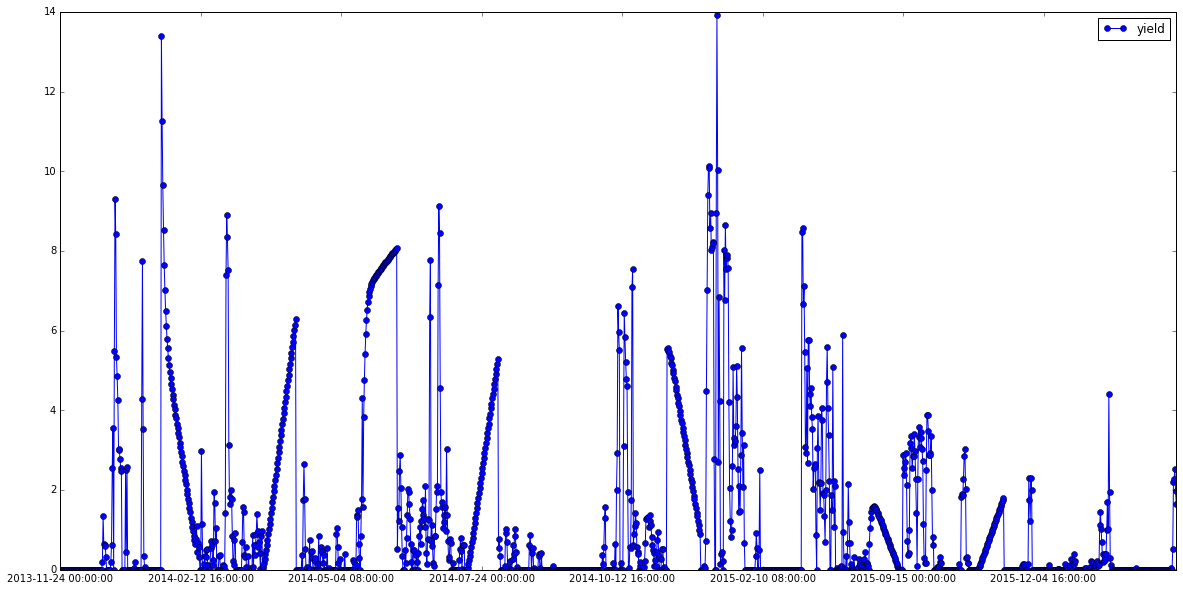

In [5]:
figure =plt.figure(figsize = (20,10))
ax = plt.subplot(111)
get_submission_df(dfmodels.iloc[0]).plot(ax=ax,marker='o')

In [6]:
def get_ensemble(n):
    for i,row in tqdm(dfmodels.head(n).iterrows(),total=n):
        if i ==0 :
            df = get_submission_df(row)
        else:
            df = df.join(df,how='left',rsuffix='r')
    
    return pd.DataFrame(np.mean(np.array(df),axis=1).T,columns=['yield'],index=df.index)
    

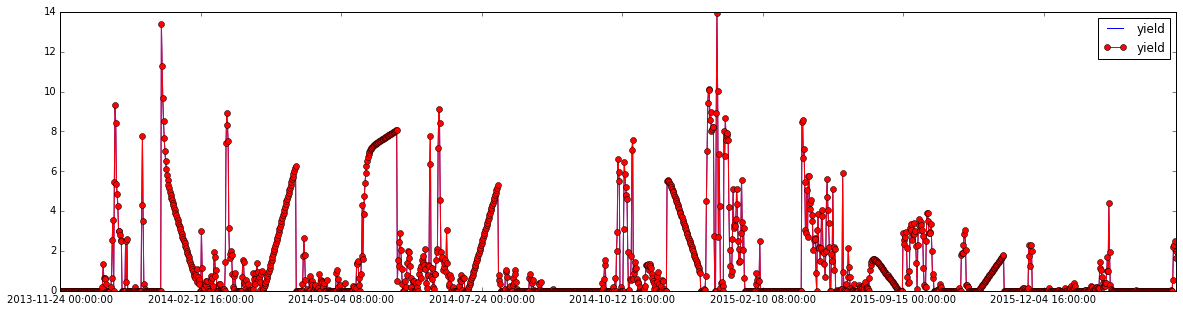

In [11]:
fig = plt.figure(figsize =(20,5))
ax = plt.subplot(111)
get_ensemble(10).plot(ax=ax)
get_ensemble(15).plot(ax=ax,color='r',marker='o')

In [12]:
df = get_ensemble(10)

In [14]:
df.to_csv('submision_today.csv')

In [15]:
os.getcwd()

'/Users/cthorey/Documents/project/competition/fognet'

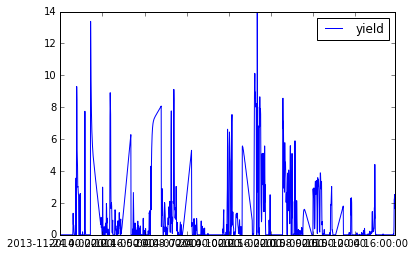

In [17]:
pd.read_csv(os.path.join(os.getcwd(),'submision_today.csv'),index_col=0).plot()

In [27]:
from utils.training_utils import *
from utils.helper import parse_conf_file

ImportError: No module named hook

In [28]:
from utils.data_utils import load_raw_data

In [29]:
data = load_raw_data()

In [32]:
len(data['submission_format']),len(get_submission_df(dfmodels.iloc[0]))

(1590, 1590)

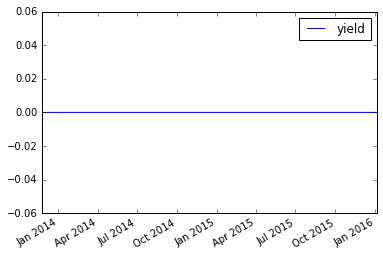

In [34]:
data['submission_format']

In [20]:
os.listdir(os.path.join(str(dfmodels.root.iloc[0]),str(dfmodels.model.iloc[0])))

['conf_model.json',
 'model.pkl',
 'model_history.pkl',
 'model_history.png',
 'submissions_20160402_164323.csv',
 'train_3.929_val_2.407']

In [16]:
dfmodels.root.iloc[0]

'/Users/thorey/Documents/project/competition/fognet/models/clavius/lstm/model_1'

In [5]:
dfmodels = get_result(base_model,hp = ['hiddens','lr','reg','nb_layers','update_rule','stride','seq_length'])

In [39]:
dfmodels.iloc[0].model

'hiddens_100_seq_length_300_update_rule_adam_stride_2_lr_0.01_nb_layers_3_reg_0.0001'

In [24]:
for i in range(10):
    name = os.path.join(dfmodels.iloc[i].root,dfmodels.iloc[i].model)
    sub = [f for f in os.listdir(name) if f.split('_')[0] == 'submissions'][0]
    name_sub = os.path.join(name,sub)
    if i ==0:
         df = pd.read_csv(name_sub,index_col=0)
    else:
        df = df.join(pd.read_csv(name_sub,index_col=0),how='left',rsuffix='r')
    

In [27]:
df['yield_finish'] = np.mean(np.array(df),axis=1)

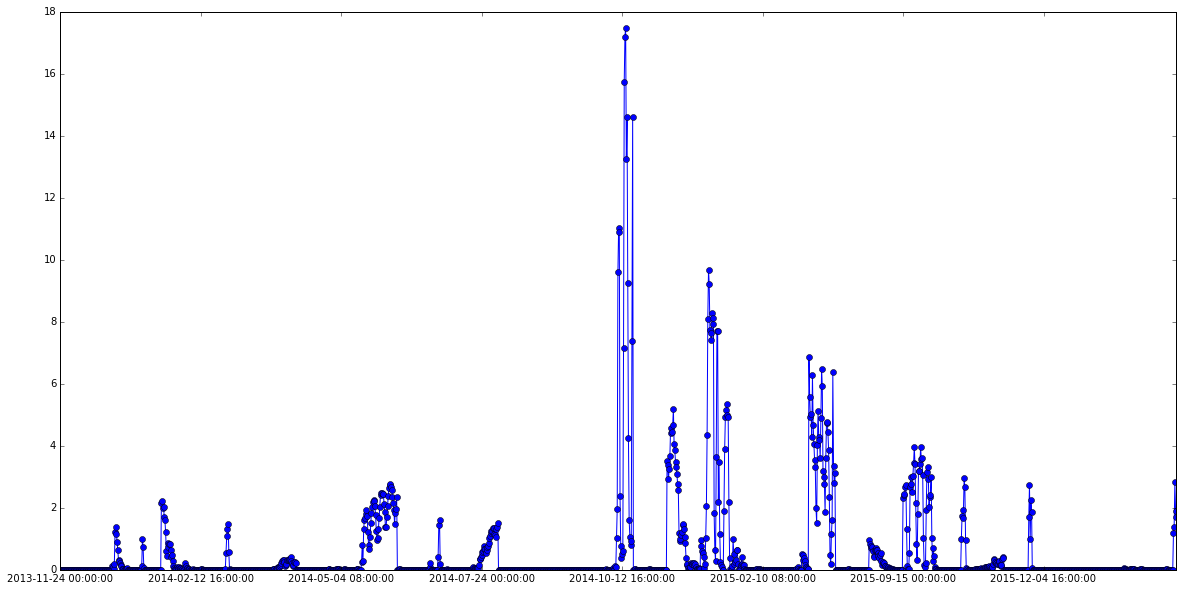

In [42]:
figure =plt.figure(figsize = (20,10))
df.yield_finish.plot(marker='o')

In [33]:
submission = pd.DataFrame(np.array(df.yield_finish),columns=['yield'],index=df.index)

In [37]:
submission.to_csv('submission_today.csv')

dfmodels

In [40]:
dfmodels.model.tolist()[:3]

['hiddens_200_seq_length_300_update_rule_adam_stride_2_lr_0.01_nb_layers_1_reg_0.0',
 'hiddens_50_seq_length_300_update_rule_rmsprop_stride_1_lr_0.01_nb_layers_2_reg_0.0',
 'hiddens_50_seq_length_300_update_rule_rmsprop_stride_2_lr_0.001_nb_layers_3_reg_0.0001']

In [21]:
a = pd.read_csv(os.path.join(dfmodels.iloc[0].root,dfmodels.iloc[0].model,'submissions_20160402_164323.csv'),index_col=0)

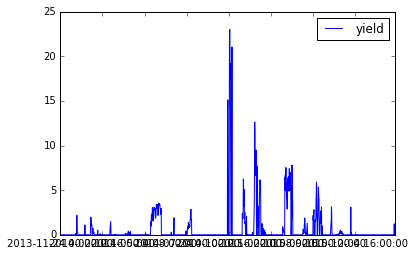

In [22]:
a.plot()

In [28]:
from utils.train_utils import *

/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [29]:
config = parse_conf_file(os.path.join(dfmodels.iloc[0].root,dfmodels.iloc[0].model,'conf_model.json'))
model = Model(config,mode ='inspection')

{'hiddens': 200, 'lr': 0.001, 'reg': 0.0}
Loading the prepro pipeline
{u'pipe_kwargs': {u'macro_aga': {u'FeatureSelector__features': [u'aga_Ff',
                                                                u"aga_W'W'",
                                                                u'aga_DD',
                                                                u'aga_ff10',
                                                                u'aga_VV',
                                                                u'aga_WW',
                                                                u'aga_c',
                                                                u'aga_Td',
                                                                u'aga_U',
                                                                u'aga_T',
                                                                u'aga_P',
                                                                u'aga_P0'],
                             

IOError: [Errno 2] No such file or directory: u'/Users/thorey/Documents/project/competition/fognet/models/clavius/lstm/model_1/hiddens_200_seq_length_100_update_rule_adam_stride_2_lr_0.001_nb_layers_2_reg_0.0/model.pkl'

In [13]:
def show_learning(model):
    im = Image.open(os.path.join(model,'model_history.png'))
    im.show()

In [14]:
show_learning(os.path.join(base_model,dfmodels.iloc[1].model))

NameError: global name 'Image' is not defined

In [190]:
from utils.train_utils import *

In [8]:
from utils.ensemble_utils import *

ImportError: No module named ensemble_utils

In [9]:
ensemble = Ensemble(dfmodels,5)

NameError: name 'Ensemble' is not defined

In [22]:
ensemble.make_submission()

Will write output to /Users/thorey/Documents/project/competition/fognet/models/clavius/lstm/model_1/ensemble/submissions_20160328_152745.csv


In [13]:
from tqdm import *

In [15]:
for i in tqdm(range(10),ncols=len(range(10))):
    pass

In [6]:
ensemble.predict_yield()

NameError: name 'ensemble' is not defined

In [193]:
ensemble.nb_models

2

In [195]:
ensemble.get_score_set('train')

KeyError: 'yield_pred'

In [201]:
split = 'train'
for i, model in enumerate(ensemble.ensemble):
    if i == 0:
        df_tmp = model.predict_yield(split)
        df = df_tmp[['yield', 'yield_pred']]
    else:
        df_tmp = model.predict_yield(split)
        df['yield_pred%d' % (i)] = df_tmp['yield_pred']

In [ ]:
def get_score_set(self, split):
        df = self.predict_yield(split)
        y = df['yield']
        ypred = np.array(df[[f for f in df.columns if len(f.split('_')) == 2]])
        ypred = np.mean(ypred, axis=0)
        return np.sqrt(mean_squared_error(y, ypred))


In [207]:
y = df['yield']
ypred = np.array(df[[f for f in df.columns if len(f.split('_')) == 2]])
ypred = np.mean(ypred, axis=1)

In [209]:
np.sqrt(mean_squared_error(y, ypred))

0.96317338040630862

In [208]:
y.shape,ypred.shape

((3738,), (3738,))

In [182]:
en = ensemble.ensemble[0]

In [183]:
df = en.predict_yield('train')

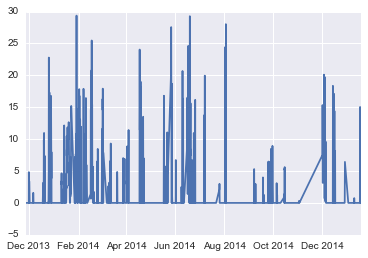

In [186]:
plt.plot(df['yield_pred'])

In [187]:
df['yield_pred']

2013-11-28 00:00:00    5.551115e-17
2013-11-28 02:00:00    5.551115e-17
2013-11-28 04:00:00    5.551115e-17
2013-11-28 06:00:00    5.551115e-17
2013-11-28 08:00:00    5.551115e-17
2013-11-28 10:00:00    5.551115e-17
2013-11-28 12:00:00    5.551115e-17
2013-11-28 14:00:00    5.551115e-17
2013-11-28 16:00:00    5.551115e-17
2013-11-28 18:00:00    5.551115e-17
2013-11-28 20:00:00    5.551115e-17
2013-11-28 22:00:00    5.551115e-17
2013-11-29 00:00:00    5.551115e-17
2013-11-29 02:00:00    5.551115e-17
2013-11-29 04:00:00    5.551115e-17
2013-11-29 06:00:00    5.551115e-17
2013-11-29 08:00:00    5.551115e-17
2013-11-29 10:00:00    5.551115e-17
2013-11-29 12:00:00    5.551115e-17
2013-11-29 14:00:00    5.551115e-17
2013-11-29 16:00:00    5.551115e-17
2013-11-29 18:00:00    5.551115e-17
2013-11-29 20:00:00    5.551115e-17
2013-11-29 22:00:00    5.551115e-17
2013-11-30 00:00:00    5.551115e-17
2013-11-30 02:00:00    5.551115e-17
2013-11-30 04:00:00    5.551115e-17
2013-11-30 06:00:00    5.551

In [146]:
config = parse_conf_file(os.path.join(base_model,model1.iloc[0].model,'conf_model.json'))
first = Model(config,mode = 'inspection')
config = parse_conf_file(os.path.join(base_model,model1.iloc[1].model,'conf_model.json'))
second = Model(config,mode = 'inspection')

{'hiddens': 200, 'lr': 0.01, 'reg': 0.0}
Loading the prepro pipeline : [u'MyImputer', u'MyStandardScaler']
Loading data iterator using : benchmark
Le train is composed by 21 group and 3738 observation
Le val is composed by 8 group and 1112 observation
Le test is composed by 5 group and 948 observation
Build the architecture: lstm, lstm
Initialize the network 
Loading model params from ~/Documents/project/competition/fognet/models/clavius/lstm/model_1/hiddens_200_seq_length_200_update_rule_rmsprop_stride_2_lr_0.01_nb_layers_2_reg_0.0/model.pkl
Loaded parameters to layer 'lstm_0' (shape 9x200).
Loaded parameters to layer 'lstm_0' (shape 200x200).
Loaded parameters to layer 'lstm_0' (shape 200).
Loaded parameters to layer 'lstm_0' (shape 9x200).
Loaded parameters to layer 'lstm_0' (shape 200x200).
Loaded parameters to layer 'lstm_0' (shape 200).
Loaded parameters to layer 'lstm_0' (shape 9x200).
Loaded parameters to layer 'lstm_0' (shape 200x200).
Loaded parameters to layer 'lstm_0' (shap

In [147]:
config = parse_conf_file(os.path.join(base_model,model1.iloc[1].model,'conf_model.json'))
second = Model(config,mode = 'inspection')

{'hiddens': 200, 'lr': 0.01, 'reg': 1e-06}
Loading the prepro pipeline : [u'MyImputer', u'MyStandardScaler']
Loading data iterator using : benchmark
Le train is composed by 21 group and 3738 observation
Le val is composed by 8 group and 1112 observation
Le test is composed by 5 group and 948 observation
Build the architecture: lstm, lstm
Initialize the network 
Loading model params from ~/Documents/project/competition/fognet/models/clavius/lstm/model_1/hiddens_200_seq_length_300_update_rule_rmsprop_stride_2_lr_0.01_nb_layers_3_reg_1e-06/model.pkl
Loaded parameters to layer 'lstm_0' (shape 9x200).
Loaded parameters to layer 'lstm_0' (shape 200x200).
Loaded parameters to layer 'lstm_0' (shape 200).
Loaded parameters to layer 'lstm_0' (shape 9x200).
Loaded parameters to layer 'lstm_0' (shape 200x200).
Loaded parameters to layer 'lstm_0' (shape 200).
Loaded parameters to layer 'lstm_0' (shape 9x200).
Loaded parameters to layer 'lstm_0' (shape 200x200).
Loaded parameters to layer 'lstm_0' (

In [ ]:
    Parallel(n_jobs=cpu_count())(delayed(train_model)(
        conf, parameters_grid.keys()) for conf in confs)

In [ ]:
dfmode

In [168]:
def get_model(dfmodels,i):
    base_model = str(dfmodels.root.iloc[0])
    config = parse_conf_file(os.path.join(base_model,dfmodels.iloc[i].model,'conf_model.json'))
    model =Model(config,mode = 'inspection')
    return model

In [164]:
from multiprocessing import cpu_count
from joblib import Parallel, delayed

In [167]:
def get_ensemble(dfmodels,num_models = 2):
    ensemble = Parallel(n_jobs=cpu_count())(delayed(get_model)(dfmodels,i) for i in tqdm(range(num_models)))
    return ensemble

In [166]:
ensemble = get_ensemble(model1,num_models=1)

{'hiddens': 200, 'lr': 0.01, 'reg': 0.0}
Loading the prepro pipeline : [u'MyImputer', u'MyStandardScaler']
Loading data iterator using : benchmark
Le train is composed by 21 group and 3738 observation
Le val is composed by 8 group and 1112 observation
Le test is composed by 5 group and 948 observation
Build the architecture: lstm, lstm
Initialize the network 
Loading model params from ~/Documents/project/competition/fognet/models/clavius/lstm/model_1/hiddens_200_seq_length_200_update_rule_rmsprop_stride_2_lr_0.01_nb_layers_2_reg_0.0/model.pkl
Loaded parameters to layer 'lstm_0' (shape 9x200).
Loaded parameters to layer 'lstm_0' (shape 200x200).
Loaded parameters to layer 'lstm_0' (shape 200).
Loaded parameters to layer 'lstm_0' (shape 9x200).
Loaded parameters to layer 'lstm_0' (shape 200x200).
Loaded parameters to layer 'lstm_0' (shape 200).
Loaded parameters to layer 'lstm_0' (shape 9x200).
Loaded parameters to layer 'lstm_0' (shape 200x200).
Loaded parameters to layer 'lstm_0' (shap

MaybeEncodingError: Error sending result: '[<utils.train_utils.Model object at 0x15a84b590>]'. Reason: 'PicklingError("Can't pickle <class 'utils.train_utils.Model'>: it's not the same object as utils.train_utils.Model",)'

In [162]:
ensemble

[<function __main__.get_model>]

In [143]:
predtrain = model.predict_yield('val')

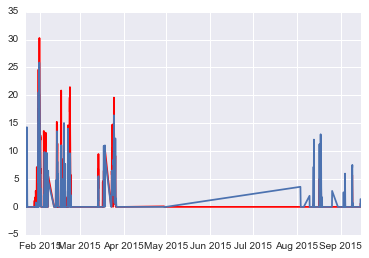

In [145]:
plt.plot(predtrain['yield'],color ='r')
plt.plot(predtrain['yield_pred'])

In [141]:
model1.head(10)

,root,model,hiddens,lr,reg,nb_layers,update_rule,stride,train,val
0,/Users/thorey/Documents/project/competition/fo...,hiddens_200_seq_length_200_update_rule_rmsprop...,200,0.01,0.000000,2,rmsprop,2,1.239,1.719
1,/Users/thorey/Documents/project/competition/fo...,hiddens_200_seq_length_300_update_rule_rmsprop...,200,0.01,0.000001,3,rmsprop,2,0.973,1.831
2,/Users/thorey/Documents/project/competition/fo...,hiddens_20_seq_length_200_update_rule_rmsprop_...,20,0.01,0.000001,2,rmsprop,1,0.911,1.885
3,/Users/thorey/Documents/project/competition/fo...,hiddens_200_seq_length_200_update_rule_adam_st...,200,0.01,0.000000,2,adam,2,1.284,1.894
4,/Users/thorey/Documents/project/competition/fo...,hiddens_200_seq_length_300_update_rule_rmsprop...,200,0.01,0.000000,2,rmsprop,2,0.756,1.897
5,/Users/thorey/Documents/project/competition/fo...,hiddens_50_seq_length_300_update_rule_rmsprop_...,50,0.01,0.000000,3,rmsprop,1,1.624,1.920
6,/Users/thorey/Documents/project/competition/fo...,hiddens_200_seq_length_300_update_rule_rmsprop...,200,0.01,0.000001,3,rmsprop,1,0.441,1.925
7,/Users/thorey/Documents/project/competition/fo...,hiddens_20_seq_length_300_update_rule_rmsprop_...,20,0.01,0.000100,1,rmsprop,1,0.678,1.928
8,/Users/thorey/Documents/project/competition/fo...,hiddens_100_seq_length_300_update_rule_rmsprop...,100,0.01,0.000001,3,rmsprop,1,1.468,1.931
9,/Users/thorey/Documents/project/competition/fo...,hiddens_50_seq_length_200_update_rule_rmsprop_...,50,0.01,0.000000,2,rmsprop,1,1.412,1.943


In [127]:
def change_root(fname):
    try:
        conf = parse_conf_file(os.path.join(fname,'conf_model.json'))
        try:
            conf['folder'] = conf['folder'].replace('/Users/clement','~')
            conf['model_fname'] = conf['model_fname'].replace('/Users/clement','~')
            conf['model_graph_fname'] = conf['model_graph_fname'].replace('/Users/clement','~')
            conf['model_history_fname'] = conf['model_history_fname'].replace('/Users/clement','~')
        except:
            pass
        conf['root'] = conf['root'].replace('/Users/clement','~')
        dump_conf_file(conf,fname)
    except:
        pass
    

In [128]:
models = [f for f in os.listdir(base_model) if f != 'conf_model.json']
for model in models:
    fname = os.path.join(base_model,model)
    change_root(fname)
    

In [125]:
fname = os.path.join(base_model,models[2])
conf = parse_conf_file(os.path.join(fname,'conf_model.json'))